<div id="container" style="position:relative;">
<div style="float:left"><h1>Movie Revenue Predictor - A story with Machine Learning</h1></div>
</div></div>

### ABSTRACT

Movie Revenue Prediction could be studied under business, statistics or forecasting.This project is an effort to build a tool using statistical and Machine Learning techniques that could help producers and investors make better and more informed investment decisions.

### INTRODUCTION

The motion pictures industry is a USD 42.5 Billion industry as of 2019, from worldwide box office collections, which is forecasted to grow to nearly USD 50 Billion in 2020. Unlike other major industries that have a well-defined process for accurately predicting top line and bottom line figures, no scientifically proven techniques exist for this industry. 

As a part-time movie buff, I have always wondered why some really good movies do not earn even remotely as much as some brain dead ones.

Given the amount of money that rides on the back of this industry one can safely say that hundreds and thousands of livelihoods are directly or indirectly dependent on the success and sustainability of this industry. This topic is worth a shot.

### OBJECTIVE

The objective of this project is to develop a tool based on statistical techniques that could predict the revenue of a movie on the basis of the different features. Below are some initial question that could be answered in this report:

🕵️‍ Is there any way to predict how much revenue a movie will generate?

🕵️‍ Is there really any recipe to make a successful movie?

🕵️‍ What are the parameters that make a movie successful?

### Little About Data.....

The data used for analysis was sourced from Kaggle [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset).

There are 7 different csv(comma separated values) files. The files used in this project are movie_metadata and credits.

The primary features include cast, crew, popularity,budget, revenue, release dates,genres, languages, production companies, countries, TMDB vote counts and IMDB rating.The original dataset contains nearly 45000 datapoints and 24 features.

### Let's get started

### Importing the libraries required for the analysis

In [1]:
import pandas as pd
import numpy as np
import ast

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data from csv files

#### This Dataset contains of all the data related to movies

In [2]:
df_movies_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')
#df_movies_metadata.head

#### This Dataset contains of all the cast and crew of the movies

In [3]:
df_credits = pd.read_csv('the-movies-dataset/credits.csv')
#df_credits.head()

#### Manually created csv file contains year and inflation index from 1915 to 2020

In [4]:
df_inflation = pd.read_csv('Inflation_By_Year.csv')
#df_inflation.head()

#### The shape of the primary dataset before cleaning.

In [5]:
df_movies_metadata.shape

(45466, 24)

#### Analyzing movies dataset for null values

In [6]:
df_movies_metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

## Data Prepration

## Cleaning of Data

#### Dropping all the columns not required for the analysis

In [7]:
df_movies_metadata.drop(['belongs_to_collection',
                'homepage',
                'overview',
                'poster_path',
                'tagline',
                'video',
                 ],
                 axis = 1,inplace = True)

In [8]:
#converting id column from object to integer
df_movies_metadata['id'] = pd.to_numeric(df_movies_metadata['id'].str.replace(r'[^\d%]',''))

#converting budget column from object to float
df_movies_metadata['budget'] = pd.to_numeric(df_movies_metadata['budget'].str.replace(r'[^\d%]',''))
df_movies_metadata['budget'] = df_movies_metadata.budget.astype(float)

#deleting all the rows having dirty data on the basis of adult column
cond = ['False' , 'True']
df_movies_metadata = df_movies_metadata.drop(df_movies_metadata[~df_movies_metadata.adult.isin(cond)].index)

#getting year and month of release
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'])

df_movies_metadata['year_of_release'] = df_movies_metadata['release_date'].dt.year
df_movies_metadata['month_of_release'] = df_movies_metadata['release_date'].dt.month

#### let us remove all rows where the revenue and budget figures look unrealistic.

In [9]:
#dropping all the rows where 'budget' < 1000  
df_movies_metadata.drop(df_movies_metadata[df_movies_metadata['budget'] < 1000].index, inplace = True)

#dropping all the rows where 'revenue' < 1000  
df_movies_metadata.drop(df_movies_metadata[df_movies_metadata['revenue'] < 1000].index, inplace = True)

In [10]:
#removing all the movies that are not released.
status = ['Rumored', 'Post Production']
df_movies_metadata = df_movies_metadata.drop(df_movies_metadata[df_movies_metadata.status.isin(status)].index)

In [11]:
#finding out the inflation adjusted figures of revenue and budget 
df_movies_metadata = pd.merge(df_movies_metadata, df_inflation, how='inner', left_on=['year_of_release'], right_on=['Year'])
df_movies_metadata.drop(['Year'],axis =1, inplace = True)

In [12]:
#getting inflation adjusted budget and revenue
df_movies_metadata['inflation_adjusted_budget'] = df_movies_metadata['budget']*\
                                                  df_movies_metadata['Inflation_Adjustment_Factor']
df_movies_metadata['inflation_adjusted_revenue'] = df_movies_metadata['revenue']*\
                                                   df_movies_metadata['Inflation_Adjustment_Factor']

In [13]:
#runtime of movies set to mean of runtime where it is null
df_movies_metadata.runtime = df_movies_metadata.runtime.fillna(round(df_movies_metadata.runtime.mean()))

In [14]:
# find duplicate rows in df_movies_metadata on the basis of id (Movie ID) 
duplicateRowsMovie = df_movies_metadata[df_movies_metadata.duplicated(['id'])]
#duplicateRowsMovie

In [15]:
# remove duplicates
df_movies_metadata.drop_duplicates(subset=['id'], inplace = True)

#### How does clean data look like?

In [16]:
df_movies_metadata.shape

(5303, 23)

#### Checking null values in the clean dataset

In [17]:
df_movies_metadata.isna().sum()

adult                          0
budget                         0
genres                         0
id                             0
imdb_id                        0
original_language              0
original_title                 0
popularity                     0
production_companies           0
production_countries           0
release_date                   0
revenue                        0
runtime                        0
spoken_languages               0
status                         0
title                          0
vote_average                   0
vote_count                     0
year_of_release                0
month_of_release               0
Inflation_Adjustment_Factor    0
inflation_adjusted_budget      0
inflation_adjusted_revenue     0
dtype: int64

## Ready for More Explotrary Data Analysis!!!

### Data Manipulation & Feature Engineering

In [18]:
# joining movie metadata dataset with credit dataset to get the cast and crew.
df_cast_crew = pd.merge(df_movies_metadata[['id','inflation_adjusted_revenue']], df_credits, on='id', how='left')

In [19]:
#The dimensions of the dataset
df_cast_crew.shape

(5308, 4)

In [20]:
# find duplicate rows in df_cast_crew on the basis of id (Movie ID) 
duplicateRowsDF = df_cast_crew[df_cast_crew.duplicated(['id', 'inflation_adjusted_revenue'])]
duplicateRowsDF.shape

(5, 4)

In [21]:
# remove duplicates
df_cast_crew.drop_duplicates(subset=['id', 'inflation_adjusted_revenue'], inplace = True)

In [22]:
#once we have removed all the duplicates, the size of the dataset
df_cast_crew.shape

(5303, 4)

In [23]:
df_cast_crew.head()

,id,inflation_adjusted_revenue,cast,crew
0,862,6.313063e+08,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,4.441274e+08,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,31357,1.376541e+08,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,949,3.167682e+08,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,9091,1.087518e+08,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


#### getting a dataframe for normalized cast coulmn

Since the data in the columns cast and crew is in normalized form, and for the further analysis I need to have the separate values of the cast and the crew.

In [24]:
df_cast_details = pd.DataFrame(df_cast_crew.cast.apply(ast.literal_eval).sum(),
                               index=df_cast_crew.id.repeat
                               (df_cast_crew.cast.apply(ast.literal_eval).str.len())
                              ).fillna(0)

In [25]:
df_cast_details.index.names = ['movie_id']
df_cast_details.reset_index(inplace = True) 

In [26]:
df_cast_details.drop(['cast_id','credit_id','profile_path'], axis = 1, inplace = True)

In [27]:
df_cast_details = pd.merge(df_cast_details, df_cast_crew[['id','inflation_adjusted_revenue']],
                           left_on=['movie_id'], right_on=['id'], how='inner')

In [28]:
df_cast_details.drop(['id_y'], axis = 1, inplace = True)

In [29]:
df_actor = pd.DataFrame()
df_actor['count_of_movies'] = df_cast_details['id_x'].value_counts()
df_actor['revenue_of_movies'] = df_cast_details.groupby('id_x').sum()[['inflation_adjusted_revenue']]
df_actor['mean_rev_of_actors'] = df_actor['revenue_of_movies']/df_actor['count_of_movies']
df_actor.index.names = ['actor_id']
df_actor.reset_index(inplace = True) 
df_actor.head()

,actor_id,count_of_movies,revenue_of_movies,mean_rev_of_actors
0,2231,70,2.224164e+10,3.177377e+08
1,380,61,8.598149e+09,1.409533e+08
2,62,60,1.220523e+10,2.034205e+08
3,192,55,1.235748e+10,2.246815e+08
4,1892,50,1.019863e+10,2.039726e+08


In [30]:
df_cast = pd.merge(df_cast_details, df_actor[['actor_id', 'mean_rev_of_actors']],
                           left_on = ['id_x'], right_on = ['actor_id'], how = 'inner')

In [31]:
# drop gender and character
df_cast.drop(['gender', 'id_x', 'character'], axis = 1, inplace = True)

In [32]:
df_Avg_Rev_of_all_actors = pd.DataFrame()
df_Avg_Rev_of_all_actors['total_of_avg_rev_of_actors'] = df_cast.groupby('movie_id').sum()['mean_rev_of_actors']
df_Avg_Rev_of_all_actors['number_of_actors_in_movie'] = df_cast.groupby('movie_id').count()['actor_id']
df_Avg_Rev_of_all_actors['avg_rev_of_all_actors_movie'] = df_Avg_Rev_of_all_actors['total_of_avg_rev_of_actors']\
                                                        /df_Avg_Rev_of_all_actors['number_of_actors_in_movie']
df_Avg_Rev_of_all_actors.reset_index(inplace = True) 

#### getting dataframe for normalized crew column

In [33]:
df_crew_details = pd.DataFrame(df_cast_crew.crew.apply(ast.literal_eval).sum(),
                               index=df_cast_crew.id.repeat
                               (df_cast_crew.crew.apply(ast.literal_eval).str.len())
                              ).fillna(0)

In [34]:
df_crew_details.index.names = ['movie_id']
df_crew_details.reset_index(inplace = True) 

In [35]:
df_crew = pd.merge(df_crew_details,df_cast_crew[['id','inflation_adjusted_revenue']],
                           left_on=['movie_id'], right_on=['id'], how='inner')

### Extracting Director's data

In [36]:
cond = ['Director']
df_director = df_crew.drop(df_crew[~df_crew.job.isin(cond)].index)

In [37]:
df_director.drop(['department',
                     'credit_id',
                     'profile_path',
                     'gender',
                     'id_y'
                     ],
                 axis = 1,inplace = True)

In [38]:
df_director_with_Rev = pd.DataFrame()
df_director_with_Rev['count_of_movies'] = df_director['id_x'].value_counts()
df_director_with_Rev['revenue_of_movies'] = df_director.groupby('id_x').sum()[['inflation_adjusted_revenue']]
df_director_with_Rev['mean_rev_of_director'] = df_director_with_Rev['revenue_of_movies'] \
                                             /df_director_with_Rev['count_of_movies']
df_director_with_Rev.index.names = ['director_id']
df_director_with_Rev.reset_index(inplace = True) 
df_director_with_Rev.head()

,director_id,count_of_movies,revenue_of_movies,mean_rev_of_director
0,488,30,1.831686e+10,6.105619e+08
1,190,27,4.552575e+09,1.686139e+08
2,1243,24,1.632385e+09,6.801604e+07
3,578,23,5.274236e+09,2.293146e+08
4,2636,21,2.415913e+09,1.150435e+08


In [39]:
df_crew_director = pd.merge(df_director, df_director_with_Rev[['director_id', 'mean_rev_of_director']],
                           left_on = ['id_x'], right_on = ['director_id'], how ='inner')

In [40]:
df_crew_director.drop(['job',
                       'id_x'
                      ],
                 axis = 1,inplace = True)

In [41]:
df_crew_director.head()

,movie_id,name,inflation_adjusted_revenue,director_id,mean_rev_of_director
0,862,John Lasseter,6.313063e+08,7879,6.422685e+08
1,9487,John Lasseter,5.739490e+08,7879,6.422685e+08
2,863,John Lasseter,7.709186e+08,7879,6.422685e+08
3,920,John Lasseter,5.913384e+08,7879,6.422685e+08
4,49013,John Lasseter,6.438303e+08,7879,6.422685e+08


In [42]:
df_Avg_Rev_of_all_directors = pd.DataFrame()
df_Avg_Rev_of_all_directors['total_of_avg_rev_of_directors'] = df_crew_director.groupby('movie_id').\
                                                                       sum()['mean_rev_of_director']
df_Avg_Rev_of_all_directors['number_of_directors_in_movie'] = df_crew_director.groupby('movie_id').count()['director_id']
df_Avg_Rev_of_all_directors['avg_rev_of_all_directors_movie'] = df_Avg_Rev_of_all_directors['total_of_avg_rev_of_directors']\
                                                            /df_Avg_Rev_of_all_directors['number_of_directors_in_movie']
df_Avg_Rev_of_all_directors.reset_index(inplace = True) 

In [43]:
df_Avg_Rev_of_all_directors.head()

,movie_id,total_of_avg_rev_of_directors,number_of_directors_in_movie,avg_rev_of_all_directors_movie
0,5,3.069775e+08,4,7.674437e+07
1,11,1.269242e+09,1,1.269242e+09
2,12,8.402127e+08,1,8.402127e+08
3,13,4.171801e+08,1,4.171801e+08
4,14,4.640943e+08,1,4.640943e+08


### Extracting data for production companies

In [44]:
df_production_details = pd.DataFrame()
df_production_details = pd.DataFrame(df_movies_metadata.production_companies.apply(ast.literal_eval).sum(),
                               index=df_movies_metadata.id.repeat
                               (df_movies_metadata.production_companies.apply(ast.literal_eval).str.len())
                              ).fillna(0)

In [45]:
df_production_details = df_production_details.rename(columns={'id': 'production_id'})
df_production_details = df_production_details.reset_index()
df_production_details = df_production_details.rename(columns={'id': 'movie_id','name': 'production_company'})

In [46]:
df_production = pd.merge(df_production_details, df_cast_crew[['id','inflation_adjusted_revenue']],
                           left_on = ['movie_id'], right_on = ['id'], how = 'inner')

In [47]:
df_production_with_Rev = pd.DataFrame()
df_production_with_Rev['count_of_movies'] = df_production['production_id'].value_counts()
df_production_with_Rev['revenue_of_movies'] = df_production.groupby('production_id').sum()[['inflation_adjusted_revenue']]
df_production_with_Rev['mean_rev_of_production'] = df_production_with_Rev['revenue_of_movies'] \
                                             /df_production_with_Rev['count_of_movies']
df_production_with_Rev.index.names = ['production_id']
df_production_with_Rev.reset_index(inplace = True) 
df_production_with_Rev.head()

,production_id,count_of_movies,revenue_of_movies,mean_rev_of_production
0,6194,416,9.315855e+10,2.239388e+08
1,33,385,8.057868e+10,2.092953e+08
2,4,335,7.672247e+10,2.290223e+08
3,306,295,7.759807e+10,2.630443e+08
4,5,210,4.106314e+10,1.955387e+08


In [48]:
df_producer = pd.merge(df_production,df_production_with_Rev[['production_id', 'mean_rev_of_production']],
                           on=['production_id'], how='inner')

In [49]:
df_producer.head()

,movie_id,production_id,production_company,id,inflation_adjusted_revenue,mean_rev_of_production
0,862,3,Pixar Animation Studios,862,6.313063e+08,7.749217e+08
1,9487,3,Pixar Animation Studios,9487,5.739490e+08,7.749217e+08
2,863,3,Pixar Animation Studios,863,7.709186e+08,7.749217e+08
3,585,3,Pixar Animation Studios,585,8.217117e+08,7.749217e+08
4,62211,3,Pixar Animation Studios,62211,8.253512e+08,7.749217e+08


In [50]:
df_Avg_Rev_of_all_producers = pd.DataFrame()
df_Avg_Rev_of_all_producers['total_of_avg_rev_of_producers'] = df_producer.groupby('movie_id').\
                                                                       sum()['mean_rev_of_production']
df_Avg_Rev_of_all_producers['number_of_producers_in_movie'] = df_producer.groupby('movie_id').count()['production_id']
df_Avg_Rev_of_all_producers['avg_rev_of_all_producers_movie'] = df_Avg_Rev_of_all_producers['total_of_avg_rev_of_producers']\
                                                            /df_Avg_Rev_of_all_producers['number_of_producers_in_movie']
df_Avg_Rev_of_all_producers.reset_index(inplace = True) 

### Getting Genre Data

In [51]:
df_genres_details = pd.DataFrame(df_movies_metadata.genres.apply(ast.literal_eval).sum(),
                               index=df_movies_metadata.id.repeat
                               (df_movies_metadata.genres.apply(ast.literal_eval).str.len())
                              ).fillna(0)

df_genres_details = df_genres_details.rename(columns={'id': 'genre_id'})
df_genres_details = df_genres_details.reset_index()
df_genres_details = df_genres_details.rename(columns={'id': 'movie_id', 'name': 'genre'})
df_genres_details = df_genres_details.drop('genre_id', axis = 1)

In [52]:
df_genres_details.head()

,movie_id,genre
0,862,Animation
1,862,Comedy
2,862,Family
3,8844,Adventure
4,8844,Fantasy


As we could see, there are more than one genre present and this is creating multiple rows for one one movie.To resolve this issue, I decided to get this data into dummy form and so for each movie we will have just one row highlighting only those genres which are available for that movie.

#### Getting dummy data for genre as multiple genres are available for one movie

In [53]:
dummies = pd.get_dummies(df_genres_details, columns=['genre'])
#dummies.head()

In [54]:
dummies = dummies.groupby(['movie_id']).sum()
dummies.reset_index(inplace = True) 
dummies.head()

,movie_id,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,5,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,12,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,14,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dummies.shape

(5292, 21)

There are 11 such movies where the genre is not specified , taking the majority genre, I am setting them to 'Drama'

In [57]:
# set 11 missing NULL dummies to genre_Drama 
df_movies_with_genre = pd.merge(df_movies_metadata, dummies, left_on = 'id', right_on = 'movie_id', how = 'left')
df_movies_with_genre.genre_Drama = df_movies_with_genre.genre_Drama.fillna(1)
df_movies_with_genre.fillna(0, inplace = True)
df_movies_with_genre.drop('id', axis = 1, inplace = True)

In [58]:
df_movies_with_genre.shape

(5303, 43)

Once all the features I need are in place, I created a final dataset contains all the features needed.

In [59]:
df_final = pd.DataFrame()

# add average of revenue earned by actors working in the film 
df_final = pd.merge(df_movies_with_genre, df_Avg_Rev_of_all_actors[['movie_id', 'avg_rev_of_all_actors_movie']],
                    on = ['movie_id'], how = 'left')
# add average of revenue earned by directors directing the film 
df_final = pd.merge(df_final, df_Avg_Rev_of_all_directors[['movie_id', 'avg_rev_of_all_directors_movie']],
                    on = ['movie_id'], how = 'left')

# add average of revenue earned by production companies producing the film
df_final = pd.merge(df_final, df_Avg_Rev_of_all_producers[['movie_id', 'avg_rev_of_all_producers_movie']],
                    on = ['movie_id'], how = 'left')

In [60]:
# a very small percentage of average revenue figures are missing so I am replacing this with the values of inflation 
# adjusted revenue 
df_final.avg_rev_of_all_actors_movie = df_final.avg_rev_of_all_actors_movie.fillna(df_final.inflation_adjusted_revenue)
df_final.avg_rev_of_all_directors_movie =df_final.avg_rev_of_all_directors_movie.fillna(df_final.inflation_adjusted_revenue)
df_final.avg_rev_of_all_producers_movie =df_final.avg_rev_of_all_producers_movie.fillna(df_final.inflation_adjusted_revenue)

There are still some features which I was using for the feature engineering or Data cleaning and now it's time to drop those columns

In [61]:
df_final.drop(['adult', 'budget', 'genres', 'imdb_id', 'original_title', 'production_companies', 'production_countries', 
               'release_date', 'revenue','spoken_languages', 'status', 'Inflation_Adjustment_Factor'],
              axis = 1,
              inplace = True
             )

Final Dataset was little tuned.

In [62]:
df_final = df_final[['movie_id', 'title', 'original_language', 'popularity', 'year_of_release', 'month_of_release', 
                     'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy','genre_Crime', 'genre_Documentary'
                     ,'genre_Drama', 'genre_Family','genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror',
                      'genre_Music', 'genre_Mystery', 'genre_Romance','genre_Science Fiction', 'genre_TV Movie', 
                      'genre_Thriller','genre_War', 'genre_Western','avg_rev_of_all_actors_movie',
                      'avg_rev_of_all_directors_movie','avg_rev_of_all_producers_movie','vote_average','vote_count', 
                      'inflation_adjusted_budget','inflation_adjusted_revenue']]

In [63]:
df_final['year_of_release'] = df_final['year_of_release'].astype(int)
df_final['month_of_release'] = df_final['month_of_release'].astype(int)

Let's see the shape of the final dataset.

In [64]:
df_final.shape

(5303, 33)

Once I had my final dataset.The next step is Visualization.

## Visualization

This shows the count of movies per genre

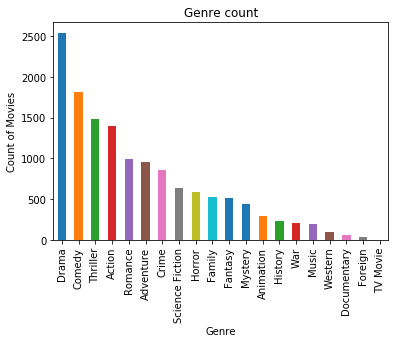

In [65]:
plt.figure()
df_genres_details['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Genre count')
plt.show()

Let's see, how movie business doing over the decades.

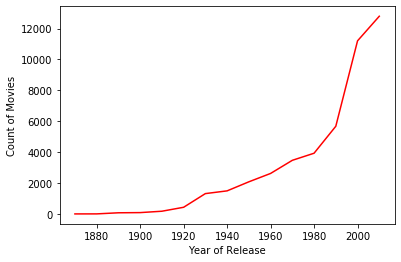

In [66]:
df_movie_metadata = pd.DataFrame()
df_movie_per_year = pd.DataFrame()
df_movie_count = pd.DataFrame()
df_movie_metadata = pd.read_csv('the-movies-dataset/movies_metadata.csv')
df_movie_metadata.dropna(subset=['release_date'],inplace=True)
cond = ['False' , 'True']
df_movie_metadata = df_movie_metadata.drop(df_movie_metadata[~df_movie_metadata.adult.isin(cond)].index)
df_movie_metadata['release_date'] = pd.to_datetime(df_movie_metadata['release_date'])
df_movie_metadata['year_of_release'] = df_movie_metadata['release_date'].dt.year

df_movie_per_year =  df_movie_metadata[['year_of_release','id']]
cond1 = [2020]
df_movie_count = df_movie_per_year.groupby('year_of_release').count()
df_movie_count = df_movie_count.drop(df_movie_count[df_movie_count.index.isin(cond1)].index)
df_movie_count = df_movie_count.groupby((df_movie_count.index//10)*10).sum()

fig = plt.figure()
plt.plot(df_movie_count.index, df_movie_count['id'], label='High', color='red')
plt.xlabel('Year of Release')
plt.ylabel('Count of Movies')
plt.show()

The next visulizations shows the spread of the Budget and Revenue

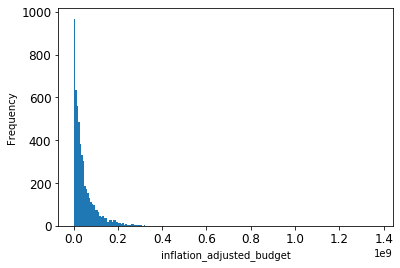

In [67]:
df_final['inflation_adjusted_budget'].hist(bins=200, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("inflation_adjusted_budget")
plt.ylabel("Frequency")
plt.show()

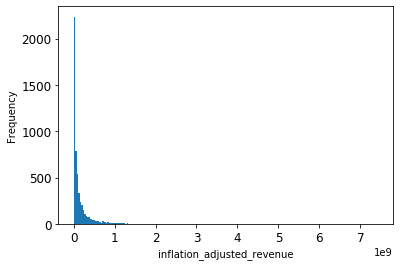

In [68]:
df_final['inflation_adjusted_revenue'].hist(bins=200, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("inflation_adjusted_revenue")
plt.ylabel("Frequency")
plt.show()

The descriptive statistics :

#### Getting Correlation and p-values of Inflation Adjusted Revenue with other features

In [69]:
from scipy import stats
df_correlation = pd.DataFrame() # Correlation matrix
for x in df_final.columns:
    if(df_final[x].dtypes != 'object' ):
        corr = stats.pearsonr(df_final[x], df_final['inflation_adjusted_revenue'])
        df_correlation.loc[x,'Correlation'] = corr[0]
        df_correlation.loc[x,'p-value'] = corr[1]
        
df_correlation['absolute_value_coefficient'] = np.abs(df_correlation['Correlation'])

In [70]:
df_correlation

,Correlation,p-value,absolute_value_coefficient
movie_id,-0.078808,9.109015e-09,0.078808
year_of_release,-0.101109,1.581369e-13,0.101109
month_of_release,0.056580,3.747062e-05,0.056580
genre_Action,0.125643,4.161377e-20,0.125643
genre_Adventure,0.267901,7.598963e-88,0.267901
genre_Animation,0.184587,7.361600e-42,0.184587
genre_Comedy,-0.049480,3.126914e-04,0.049480
genre_Crime,-0.050956,2.054128e-04,0.050956
genre_Documentary,-0.042291,2.067496e-03,0.042291
genre_Drama,-0.141024,5.792588e-25,0.141024


The graphical presentation for the correlations is shown below:

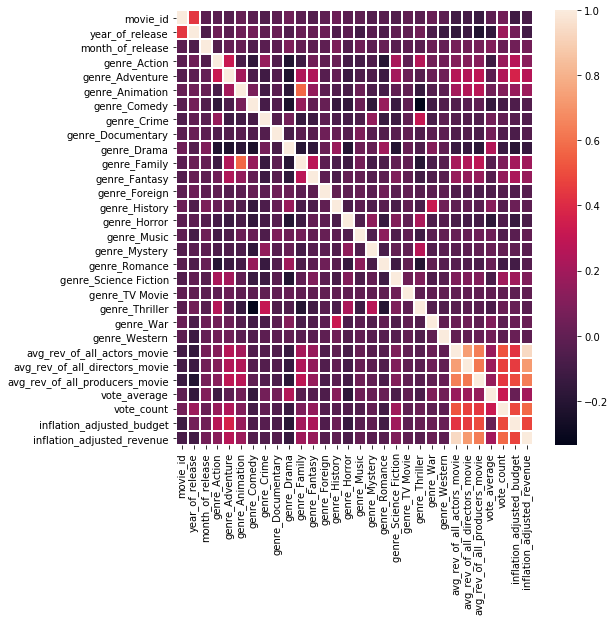

In [71]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df_final.corr(),linewidth=1.0)
plt.show()

Let's have a look at how the data(inflation_adjusted_revenue) distribution versus different features using pairplots

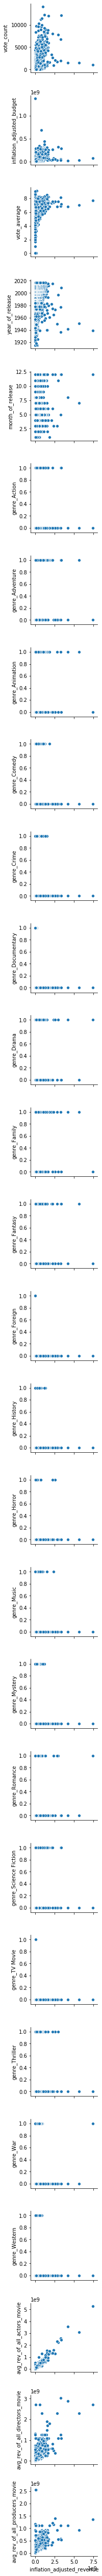

In [72]:
pp = sns.pairplot(data=df_final,
                  x_vars=['inflation_adjusted_revenue'],
                  y_vars=['vote_count', 'inflation_adjusted_budget', 'vote_average','year_of_release', 'month_of_release', 
                     'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy','genre_Crime', 'genre_Documentary'
                     ,'genre_Drama', 'genre_Family','genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror',
                      'genre_Music', 'genre_Mystery', 'genre_Romance','genre_Science Fiction', 'genre_TV Movie', 
                      'genre_Thriller','genre_War', 'genre_Western','avg_rev_of_all_actors_movie',
                      'avg_rev_of_all_directors_movie','avg_rev_of_all_producers_movie'])

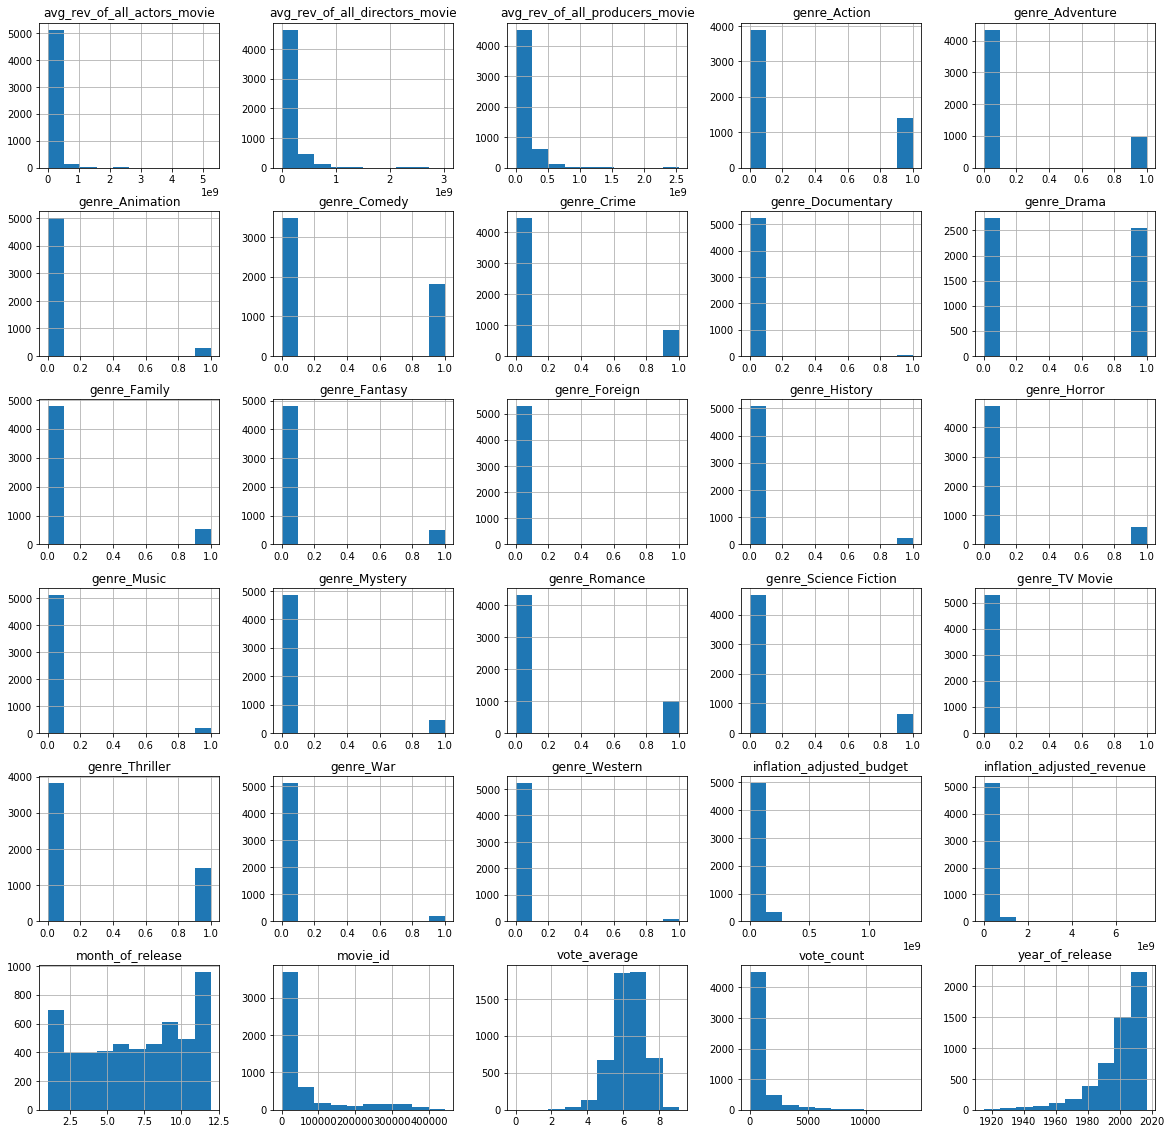

In [73]:
df_final.hist(figsize = (20,20))
plt.show()

## Data Modeling

Considering all the numerical data featutres

In [74]:
df_numeric_data = df_final._get_numeric_data()

In [75]:
X = df_numeric_data.iloc[:, :-1]
y= df_numeric_data.iloc[:, -1]

In [76]:
#dividing data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
#scale data
from sklearn.preprocessing import StandardScaler

my_scaler = StandardScaler()

X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

#Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

#Score it
train_score = linear_model.score(X_train_scaled, y_train)
test_score = linear_model.score(X_test_scaled, y_test)

print(f'Score on train data: {train_score}')
print(f'Score on test data: {test_score}')

Score on train data: 0.9044150046151612
Score on test data: 0.8604645150031482


### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor 

dt_scores = []
depths = list(range(1,20))
for d in depths:
    
    my_dt = DecisionTreeRegressor(max_depth=d)
    my_dt.fit(X_train_scaled, y_train)
    
    dt_scores.append(my_dt.score(X_test_scaled, y_test))

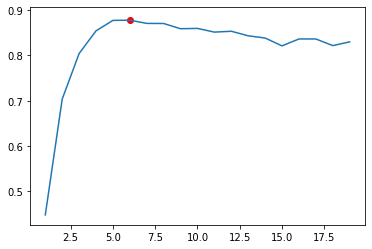

In [81]:
plt.figure()
plt.plot(depths, dt_scores)
plt.scatter(depths[np.argmax(dt_scores)], 
            dt_scores[np.argmax(dt_scores)], 
            c="red")
plt.show()

In [83]:
print('The value of depth at which Test Score is maximum: ',dt_scores.index(max(dt_scores))+1 )
print('The maximum Test Score(R-squared) is : ',max(dt_scores))

The value of depth at which Test Score is maximum:  6
The maximum Test Score(R-squared) is :  0.8779262121020546


### PCA

In [84]:
print("There are", X.shape[0], 'data points, each with', X.shape[1], 'features.')

There are 5303 data points, each with 29 features.


In [85]:
from sklearn.decomposition import PCA

# Instantiate & fit PCA model 
# Generate all 29 PCs
my_pca = PCA(n_components=29)
my_pca.fit(X_train_scaled)

# transform data 
X_PCA = my_pca.transform(X_train_scaled)

In [86]:
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[1.39831128e-01 8.13593432e-02 7.29853824e-02 5.71905054e-02
 5.15118707e-02 4.60775370e-02 4.33911657e-02 4.00867103e-02
 3.72591291e-02 3.69176032e-02 3.52059549e-02 3.40484149e-02
 3.27716267e-02 3.13658983e-02 2.89483272e-02 2.71565327e-02
 2.49977994e-02 2.34834165e-02 2.28684581e-02 2.16205333e-02
 1.84495596e-02 1.73709064e-02 1.64160291e-02 1.40648840e-02
 1.35026917e-02 1.25770197e-02 1.08069275e-02 7.73464559e-03
 8.92543894e-34]


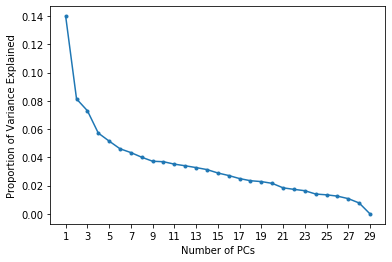

In [87]:
plt.figure()
plt.plot(range(1,30),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,30,2))
plt.show()

In [88]:
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.13983113 0.22119047 0.29417585 0.35136636 0.40287823 0.44895577
 0.49234693 0.53243364 0.56969277 0.60661037 0.64181633 0.67586474
 0.70863637 0.74000227 0.7689506  0.79610713 0.82110493 0.84458835
 0.8674568  0.88907734 0.9075269  0.9248978  0.94131383 0.95537872
 0.96888141 0.98145843 0.99226535 1.         1.        ]


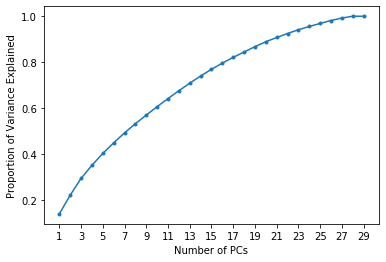

In [89]:
plt.figure()
plt.plot(range(1,30),expl_var_cumulative,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,30,2))
plt.show()

In [90]:
# 6 features gives the same results as 29
my_pca = PCA(n_components=6)
my_pca.fit(X_train)

# transform data onto the first two principal components
X_train_PCA = my_pca.transform(X_train_scaled)

# Transform test data, with PCA fit on trainign data!!!
X_test_PCA = my_pca.transform(X_test_scaled)

In [91]:
# Instantiate and train the classifier
linear_regression_PCA = LinearRegression()
linear_regression_PCA.fit(X_train_PCA, y_train)
# Evaluate it

print(f'The train Score(R-squared) is: {linear_regression_PCA.score(X_train_PCA,y_train):0.3f}')
print(f'The test Score(R-squared) is: {linear_regression_PCA.score(X_test_PCA,y_test):0.3f}')

The train Score(R-squared) is: 0.901
The test Score(R-squared) is: 0.860


### KNN  

In [92]:
from sklearn.neighbors import KNeighborsRegressor

knn_scores = []
Ks = list(range(1,20))
for k in Ks:
    
    my_knn = KNeighborsRegressor(n_neighbors=k)
    my_knn.fit(X_train_scaled, y_train)
    
    knn_scores.append(my_knn.score(X_test_scaled, y_test))

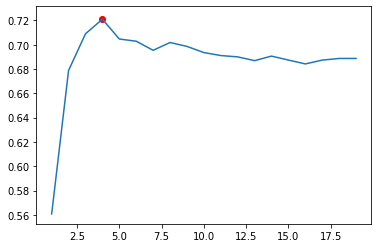

In [93]:
plt.figure()
plt.plot(Ks, knn_scores)
plt.scatter(depths[np.argmax(knn_scores)], 
            knn_scores[np.argmax(knn_scores)], 
            c="red")
plt.show()

In [95]:
print('The number of neighbours at which Test Score(R-squared) is maximum: ',knn_scores.index(max(knn_scores))+1 )
print('The maximum Test Score(R-squared) is : ', max(knn_scores))

The number of neighbours at which Test Score(R-squared) is maximum:  4
The maximum Test Score(R-squared) is :  0.7210372471888487


### SVM

In [96]:
from sklearn.svm import LinearSVR
c_values = list(range(-10, 15))
train_scores = []
test_scores = []

for c in c_values:
    my_SVM = LinearSVR(C=10**c)
    my_SVM.fit(X_train_scaled, y_train)

    
    train_scores.append(my_SVM.score(X_train_scaled, y_train))
    test_scores.append(my_SVM.score(X_test_scaled, y_test))

In [97]:
print('The number of neighbours at which Test Score is maximum: '
      ,c_values[np.argmax(test_scores)])
print('The maximum Test Score is : ',max(test_scores))

The number of neighbours at which Test Score is maximum:  8
The maximum Test Score is :  0.8533189984452335


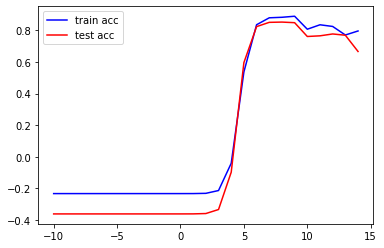

In [98]:
plt.figure()
plt.plot(c_values, train_scores, c="blue", label="train acc")
plt.plot(c_values, test_scores, c="red", label="test acc")
plt.legend()
plt.show()

### Comparing predicted revenues and the actual inflation_adjusted_revenue and how far the predicted values are from the values provided in the dataset

In [99]:
y_pred = linear_model.predict(X_test_scaled)
df = pd.DataFrame()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['difference']= abs((df['Actual']-df['Predicted'])/df['Actual'] * 100)

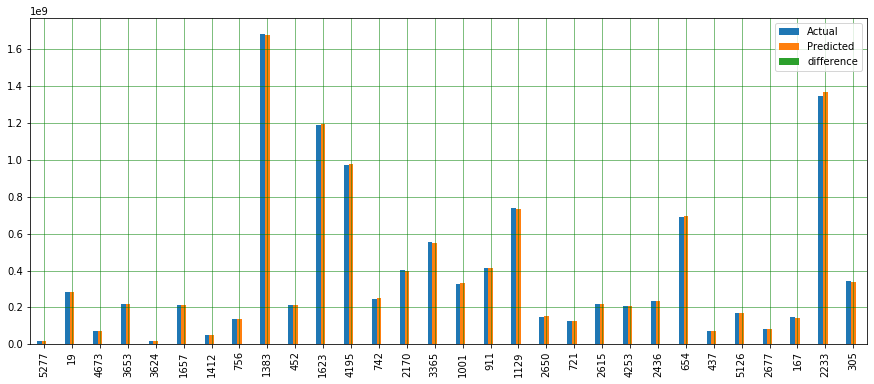

In [100]:
df1 = df.sort_values('difference',ascending = True).head(30)
df1.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## RESULTS & CONCLUSIONS

I modelled against various ML Regressor models (Linear, KNN, Decision Tree and SVM) and the results were almost identical. Amongst all, the best results that I got is with Decision Tree Regressor which is <b>87.88%</b>.

Since the results were identical, in order to increase the efficiency of the models further I need to concentrate  on more Feature Engineering.

## FUTURE WORK

<ul>
    <li>The above analysis is not the final outcome of the project. Since in box-office terms, one can classify movies as :

<b>BlockBuster, Superhit, Hit, Average, Flop</b> and <b>Disaster</b>

I wish to convert this into Multinomial classification, where I would use neural networks.
    </li>
    <li>I would also like to consider <b>keywords</b> describing a movie as a feature to evaluate NLP models as part of the classification.</li>
    </ul>